# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

618


In [13]:
print(round(len(cities)/50,0))

12.0


In [27]:
count = 1
city_set = 1
# for city in cities:
    
    print(f'Processing record {count} of set {city_set} | {city}')
    if count < 50: 
        count = count + 1
    else:
        count = 1
        city_set = city_set + 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#city = "norwich"
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_url = f"{url}appid={weather_api_key}&units={units}&q="
# Build a url to ensure connection and list the data partial query URL
#query_url = url + '&units=' + units + "&q=" + city + '&appid='+ api_key
# x = requests.get(weather_url + city)
# x = x.json()
# print(json.dumps(x, indent=4, sort_keys=True))

In [30]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 1

In [31]:
#towns = ["cape town", "norwich", 'binny', 'wildwood']

print('Beginning Data Retrieval')     
print('-----------------------------')

for city in cities:
    print(f'Processing record {count} of set {city_set} | {city}')
     
    response = requests.get(weather_url + city).json()    
    #print(json.dumps(response, indent=4, sort_keys=True))   
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if count < 50:
            count = count + 1
        else:
            count = 1
            city_set = city_set + 1
        
    except Exception as e:
        # Append null values
        print(e)
        print(f"City {city} not found. Skipping...")
        count = count + 1
        pass
print('-----------------------------')                         
print('Data Retrieval Complete')    
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | albany
Processing record 2 of set 1 | hobart
Processing record 3 of set 1 | ushuaia
Processing record 4 of set 1 | rikitea
Processing record 5 of set 1 | castro
Processing record 6 of set 1 | marsh harbour
Processing record 7 of set 1 | batemans bay
Processing record 8 of set 1 | hithadhoo
Processing record 9 of set 1 | yellowknife
Processing record 10 of set 1 | hilo
Processing record 11 of set 1 | chifeng
Processing record 12 of set 1 | tongliao
Processing record 13 of set 1 | luderitz
Processing record 14 of set 1 | illoqqortoormiut
'name'
City illoqqortoormiut not found. Skipping...
Processing record 15 of set 1 | sao joao da barra
Processing record 16 of set 1 | mataura
Processing record 17 of set 1 | reconquista
Processing record 18 of set 1 | tuatapere
Processing record 19 of set 1 | dikson
Processing record 20 of set 1 | high level
Processing record 21 of set 1 | tiksi
Processing record 22 of 

Processing record 26 of set 4 | nazas
Processing record 27 of set 4 | mehamn
Processing record 28 of set 4 | manggar
Processing record 29 of set 4 | asau
Processing record 30 of set 4 | victoria
Processing record 31 of set 4 | isla vista
Processing record 32 of set 4 | general pico
Processing record 33 of set 4 | laguna
Processing record 34 of set 4 | le vauclin
Processing record 35 of set 4 | bengkulu
Processing record 36 of set 4 | autazes
Processing record 37 of set 4 | pangnirtung
Processing record 38 of set 4 | babu
Processing record 39 of set 4 | mabaruma
Processing record 40 of set 4 | nogliki
Processing record 41 of set 4 | pisco
Processing record 42 of set 4 | altay
Processing record 43 of set 4 | havelock
Processing record 44 of set 4 | ormara
Processing record 45 of set 4 | chapais
Processing record 46 of set 4 | kusti
Processing record 47 of set 4 | jinchang
Processing record 48 of set 4 | mezhdurechensk
Processing record 49 of set 4 | petropavlovsk-kamchatskiy
Processing r

Processing record 11 of set 8 | sorland
Processing record 12 of set 8 | vidim
Processing record 13 of set 8 | barabinsk
Processing record 14 of set 8 | calafell
Processing record 15 of set 8 | freeport
Processing record 16 of set 8 | centralia
Processing record 17 of set 8 | port augusta
Processing record 18 of set 8 | vardo
Processing record 19 of set 8 | nahrin
Processing record 20 of set 8 | axim
Processing record 21 of set 8 | anadyr
Processing record 22 of set 8 | horta
Processing record 23 of set 8 | slave lake
Processing record 24 of set 8 | rio gallegos
Processing record 25 of set 8 | aguada de pasajeros
Processing record 26 of set 8 | denpasar
Processing record 27 of set 8 | stekolnyy
'name'
City stekolnyy not found. Skipping...
Processing record 28 of set 8 | barra do garcas
Processing record 29 of set 8 | twin falls
Processing record 30 of set 8 | acarau
Processing record 31 of set 8 | san ignacio
Processing record 32 of set 8 | sola
Processing record 33 of set 8 | natal
Pro

Processing record 40 of set 11 | kakinada
Processing record 41 of set 11 | tecoanapa
Processing record 42 of set 11 | ketchikan
Processing record 43 of set 11 | bonavista
Processing record 44 of set 11 | knyaginino
Processing record 45 of set 11 | erenhot
Processing record 46 of set 11 | bo phloi
Processing record 47 of set 11 | harlingen
Processing record 48 of set 11 | sucua
Processing record 49 of set 11 | ruatoria
'name'
City ruatoria not found. Skipping...
Processing record 50 of set 11 | marawi
Processing record 1 of set 12 | vanavara
Processing record 2 of set 12 | gilgit
Processing record 3 of set 12 | mutare
Processing record 4 of set 12 | mount isa
Processing record 5 of set 12 | zyryanka
Processing record 6 of set 12 | constitucion
Processing record 7 of set 12 | high rock
Processing record 8 of set 12 | havre-saint-pierre
Processing record 9 of set 12 | vestmannaeyjar
Processing record 10 of set 12 | omboue
Processing record 11 of set 12 | garzon
Processing record 12 of set

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,62.35,75,0,20.71,ZA,1666295827
1,Norwich,52.6278,1.2983,58.32,96,40,6.91,GB,1666295750
2,Wildwood,38.5828,-90.6629,72.52,28,8,1.99,US,1666295748


Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadhoo
...
Processing Record 32 of Set 4 | plettenberg bay
Processing Record 33 of Set 4 | lorengau
Processing Record 34 of Set 4 | hay river
Processing Record 35 of Set 4 | kodiak

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
#create dictionary with weather data
weather_data = {'City': city_name, 'Lat':lat, 'Lng': lng, 'Max Temp': max_temp, 
              'Humidity':humidity, 'Cloudiness': cloudiness, 'Wind Speed':wind_speed, 'Country': country,
              'Date':date}
weather_df = pd.DataFrame(weather_data)

#create CSV file 
weather_df.to_csv('WeatherPy.csv', index=False) 
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,45.27,77,0,2.19,US,1666357101
1,Hobart,-42.8794,147.3294,63.05,87,75,1.14,AU,1666356965
2,Ushuaia,-54.8000,-68.3000,44.26,57,75,9.22,AR,1666357259
3,Rikitea,-23.1203,-134.9692,70.97,75,8,21.39,PF,1666357260
4,Castro,-24.7911,-50.0119,62.24,97,100,11.25,BR,1666357230


In [33]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.649024,19.907920,61.180829,70.218695,59.211640,8.109277,1.666357e+09
std,33.325119,90.667198,20.590148,20.915735,41.510197,5.535944,9.833412e+01
min,-54.800000,-175.200000,-7.960000,9.000000,0.000000,0.000000,1.666357e+09
25%,-7.035950,-60.394400,45.655000,61.000000,13.000000,4.000000,1.666357e+09
50%,27.516700,25.570100,65.840000,75.000000,75.000000,7.140000,1.666357e+09
75%,50.190200,101.943350,78.510000,85.000000,100.000000,10.860000,1.666357e+09
max,78.218600,179.316700,97.290000,100.000000,100.000000,39.080000,1.666358e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#  Get the indices of cities that have humidity over 100%.
#Checking DF for humidty over 100% 
humid_cities = weather_df[weather_df['Humidity'] >= 100]
humid_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
8,Yellowknife,62.4560,-114.3525,28.56,100,23,5.99,CA,1666357262
70,Ust-Kuyga,70.0167,135.6000,-7.96,100,99,4.92,RU,1666357302
75,Norman Wells,65.2820,-126.8329,21.24,100,100,2.30,CA,1666357305
92,Port Hardy,50.6996,-127.4199,46.58,100,100,2.30,CA,1666357242
237,Kenai,60.5544,-151.2583,37.49,100,0,10.36,US,1666357377


In [48]:
#Identify the number of cities that have humidity over 100% and the index numbers.
print(len(humid_cities))
print(humid_cities.index)

12
Int64Index([8, 70, 75, 92, 237, 283, 286, 331, 343, 404, 411, 498], dtype='int64')


In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(humid_cities.index, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,45.27,77,0,2.19,US,1666357101
1,Hobart,-42.8794,147.3294,63.05,87,75,1.14,AU,1666356965
2,Ushuaia,-54.8000,-68.3000,44.26,57,75,9.22,AR,1666357259
3,Rikitea,-23.1203,-134.9692,70.97,75,8,21.39,PF,1666357260
4,Castro,-24.7911,-50.0119,62.24,97,100,11.25,BR,1666357230
...,...,...,...,...,...,...,...,...,...
562,La Flèche,47.6982,-0.0755,70.05,54,100,15.86,FR,1666357530
563,Puerto Peñasco,31.3167,-113.5333,79.21,56,0,4.21,MX,1666357347
564,Huntingdon,52.3305,-0.1865,64.35,84,100,8.99,GB,1666357531
565,Pakdasht,35.4752,51.6807,80.60,19,6,3.02,IR,1666357532


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

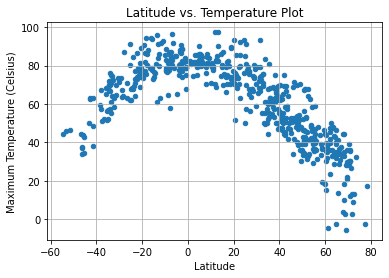

In [53]:
clean_city_data.plot('Lat', 'Max Temp', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Maximum Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_v_Temperature_Plot.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

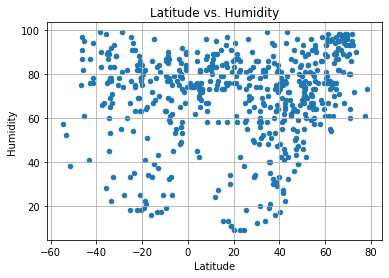

In [54]:
clean_city_data.plot('Lat', 'Humidity', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_v_Humidity_Plot.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

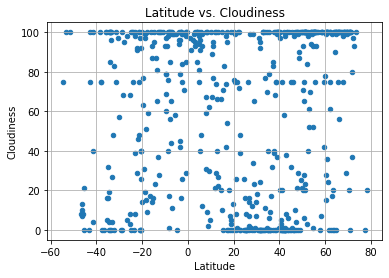

In [55]:
clean_city_data.plot('Lat', 'Cloudiness', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_v_Cloudiness_Plot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

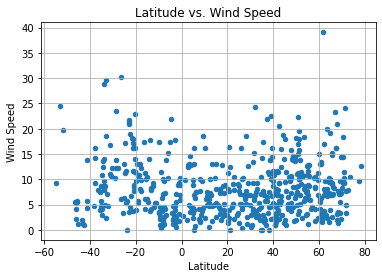

In [56]:
clean_city_data.plot('Lat', 'Wind Speed', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_v_Cloudiness_Plot.png")

# Show plot
plt.show()

## Linear Regression

In [61]:
#create new DFs for northern and southern hemishperes 
northern_hem = clean_city_data[clean_city_data['Lat'] >0]
southern_hem = clean_city_data[clean_city_data['Lat'] <0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hobart,-42.8794,147.3294,63.05,87,75,1.14,AU,1666356965
2,Ushuaia,-54.8000,-68.3000,44.26,57,75,9.22,AR,1666357259
3,Rikitea,-23.1203,-134.9692,70.97,75,8,21.39,PF,1666357260
4,Castro,-24.7911,-50.0119,62.24,97,100,11.25,BR,1666357230
6,Batemans Bay,-35.7167,150.1833,65.10,98,100,3.89,AU,1666357219


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.87641501496636


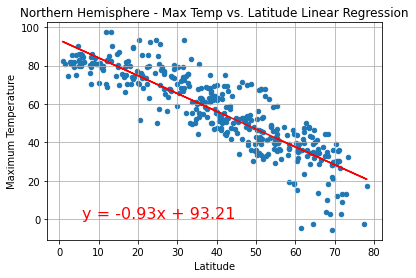

In [125]:
northern_hem.plot('Lat','Max Temp', kind='scatter')
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'],northern_hem['Max Temp'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=16,color="red")
plt.plot(northern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
#plt.savefig("N_Hemisphere_MaxTemp_vLat_LinearRegressionPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7531898921371262


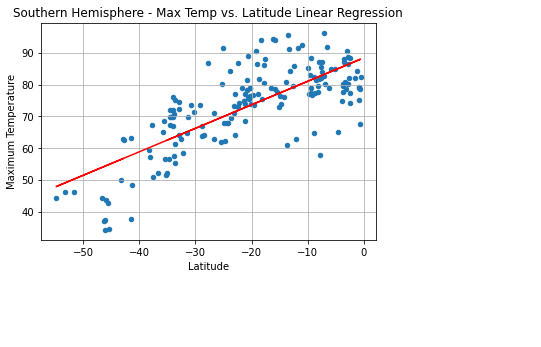

In [127]:
southern_hem.plot('Lat','Max Temp', kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'],southern_hem['Max Temp'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq2,(5.8,0.8),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
#plt.savefig("N_Hemisphere_MaxTemp_vLat_LinearRegressionPlot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21982084212648836


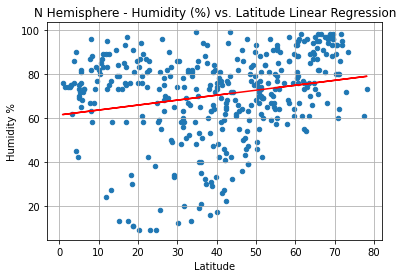

In [130]:
northern_hem.plot('Lat','Humidity', kind='scatter')
# Incorporate the other graph properties
plt.title("N Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Humidity'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq3,(5.8,0.8),fontsize=16,color="red")
plt.plot(northern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Save the figure
#plt.savefig("NHem_Humidity_v_Lat_Linear_RegressionPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.09445713626654557


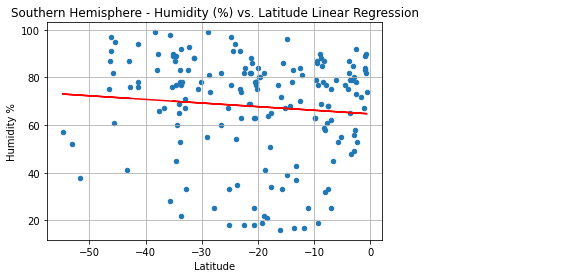

In [132]:
southern_hem.plot('Lat','Humidity', kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'],southern_hem['Humidity'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq4,(5.8,0.8),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
#plt.savefig("Latitude_v_Cloudiness_Plot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

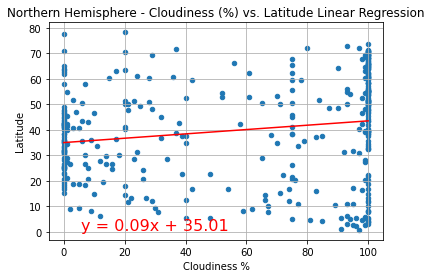

In [110]:
northern_hem.plot('Cloudiness', 'Lat', kind='scatter')
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Cloudiness'], northern_hem['Lat'])
regress_values = northern_hem['Cloudiness'] * slope + intercept
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq5,(5.8,0.8),fontsize=16,color="red")
plt.plot(northern_hem['Cloudiness'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
#plt.savefig("NHem_Cloudiness_v_Latitude__Plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28271437545513156


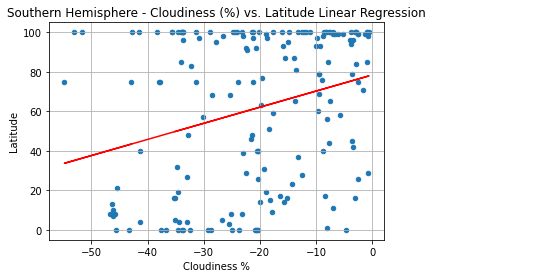

In [133]:
southern_hem.plot('Lat','Cloudiness', kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid(True)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Cloudiness'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq6,(5.8,0.8),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Save the figure
#plt.savefig("SHem_Cloudiness_v_Latitude_Plot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19541266048026157


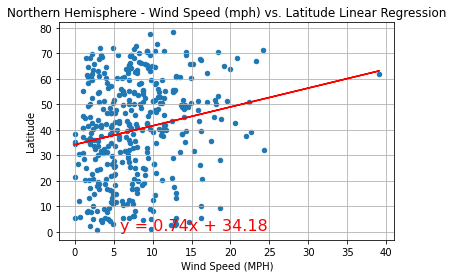

In [134]:
northern_hem.plot( 'Wind Speed', 'Lat', kind='scatter')
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitude")
plt.grid(True)
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Wind Speed'], northern_hem['Lat'])
regress_values = northern_hem['Wind Speed'] * slope + intercept
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq7,(5.8,0.8),fontsize=16,color="red")
plt.plot(northern_hem['Wind Speed'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
#plt.savefig("NHem_WindSpeed_v_Lat_LinearRegPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2006436028494254


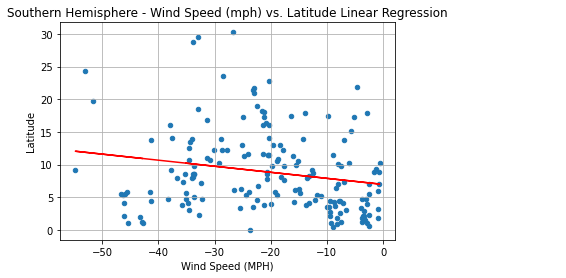

In [137]:
southern_hem.plot('Lat','Wind Speed',  kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.grid(True)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Wind Speed'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq8,(5.8,0.8),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
#plt.savefig("Latitude_v_Cloudiness_Plot.png")

# Show plot
plt.show()